# Mixing Solute Problem

A 1500 gallon tank initially contains 600 gallons of water with 5 lbs of salt dissolved in it. Water enters the tank at a rate of 9 gal/hr and the water entering the tank has a salt concentration of $\frac{1}{5}(1 + cos(t))$ lbs/gal. If a well-mixed solution leaves the tank at a rate of 6 gal/hr:

- how long does it take for the tank to overflow?

- how much salt (total amount in lbs) is in the entire tank when it overflows?

Assume each iteration is equivalent to one hour

## Step 1: Calculate time to overflow

In this step we will leave the calculation of the mass of salt aside. The goal is to solve the first question first since we have all the information readily available in the problem statement . Thinking about the second question or trying to solve both at the same time can make this problem more difficult than it actual is. A good way of thinking about this problem is as computing the balance of a checking account (tank level), where we have credits (inflow rate) and debits.

In [4]:
# First step: Calculate tank level and time of overflow using a for loop
import math

# Initial parameters
tank_capacity = 1500 # gallons
tank_level = 600     # gallons Initial tank_level
inflow_rate = 9      # gal/hr
outflow_rate = 6     # gal/hr

# Compute tank volume and salt mass at time t until tank is full
counter_hours = 0
while tank_level < tank_capacity:
    tank_level = tank_level + inflow_rate - outflow_rate   
    counter_hours += 1
    
print('Hours:',hours)
print('Tank level:',tank_level)


Hours: 300
Tank level: 1500


## Step 2: Add the calculation of the amount of salt

Now that we understand the problem in simple terms and we were able to implement it in Python is time to add the computation of the total salt at each time step. In this step is important to realize that concentration is amount of salt per unit volume of water, in this case gallons of water. Following the same reasoning for the first part of the problem, we need to calculate the balance of salt inside the tank, which is the result of the salt inflows and outflows plus whatever salt we had at the beginning. The initial amount of salt in the tank is analogous to the initial water in the tank or a seed money on a new bank account. So, to solve the problem we need:

- the inflow rate of water with salt
- the salt concentration of the inflow rate
- the outflow rate of water with salt
- the salt concentration of the outflow rate (**we need to calculate this**)

From the statement we have the first 3 pieces of information, but we lack the last one. Since concetration is mass of salt per unit volume of water, we just need to divide the total amount of salt over the current volume of water in the tank. So at the beginning we have 5 lbs/600 gallons = 0.0083 lbs/gal, which will be the salt concentration of the outflow during the first hour. Becasue the amount of water and salt in the tank change every hour, we need to include these computations in each iteration to update the salt concentration of the outflow.


In [9]:
import math

# Initial parameters
tank_capacity = 1500 # gallons
tank_level = 600    # gallons
salt_mass = 5        # lbs
inflow_rate = 9      # gal/hr
outflow_rate = 6     # gal/hr
counter_hours = 0

# Compute tank volume and salt mass at time t until tank is full
while tank_level < tank_capacity:
   
    salt_inflow = 1/5*(1 + math.cos(counter_hours)) * inflow_rate
    salt_outflow = salt_mass/tank_level * outflow_rate
    salt_mass = salt_mass + salt_inflow - salt_outflow
    tank_level = tank_level + inflow_rate - outflow_rate
    counter_hours += 1
    
print('Hours:',hours)
print('Tank level:',tank_level)
print('Mass of salt in the tank when overflowing:',round(salt_mass),'lbs')
        

Hours: 300
Tank level: 1500
Mass of salt when overflowing: 280 lbs


## Using Numpy

An alternative solution using numpy, pre-allocating arrays using NaNs, a for loop, and storing variables for posterior plotting. Of course, you can also keep track of the variables by using regular Python lists in combination with the append method.

In [16]:
import numpy as np

# Initial parameters
period = 1000        # Large number of hours to ensurehours
tank_level = np.ones(period)*np.nan # Pre-allocate array with NaNs
salt_mass = np.ones(period)*np.nan  # Pre-allocate array with NaNs
tank_level[0] = 600   # gallons
salt_mass[0] = 5        # lbs
tank_capacity = 1500 # gallons
inflow_rate = 9      # gal/hr
outflow_rate = 6     # gal/hr

# Compute tank volume and salt mass at time t until tank is full
for t in range(1,period):
    
    # The salt concentration will be computed using the tank level of the previous hour
    salt_inflow = 1/5*(1+np.cos(t)) * inflow_rate          # lbs/gal ranges between 0 and 0.4
    salt_outflow = salt_mass[t-1]/tank_level[t-1] * outflow_rate
    salt_mass[t] = salt_mass[t-1] + salt_inflow - salt_outflow
    
    # Now we can update the tank level
    tank_level[t] = tank_level[t-1] + inflow_rate - outflow_rate   # volume of the tank
   
    # Added <greater than> just in case the tank level does not exactly match the tank capacity value
    # For instance, if we set the condition to '==' and the tank_level changes from 1499 to 1501
    # between two iteration steps, then the loop will never stop.
    if tank_level[t] >= tank_capacity:
        print(t, 'hours')
        print(np.round(salt_mass[t]),'lbs of salt')
        break

300 hours
280.0 lbs of salt


## Plot charts

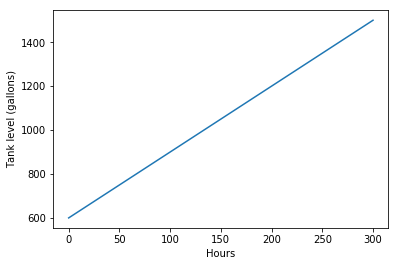

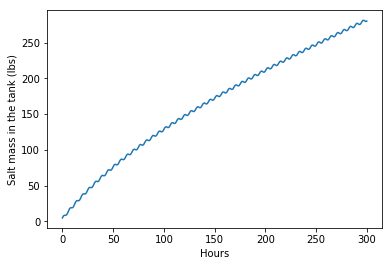

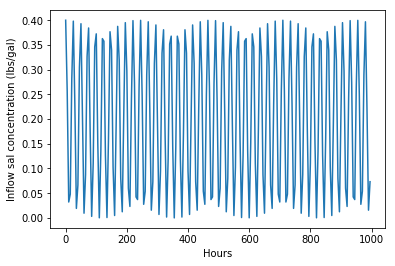

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(period),tank_level)
plt.xlabel('Hours')
plt.ylabel('Tank level (gallons)')
plt.show()

plt.figure()
plt.plot(range(period),salt_mass)
plt.xlabel('Hours')
plt.ylabel('Salt mass in the tank (lbs)')
plt.show()

plt.figure()
# Plot every 5 values to clearly see the curve in the figure
plt.plot(range(0,period,5), 1/5*(1+np.cos(range(0,period,5))))
plt.xlabel('Hours')
plt.ylabel('Inflow sal concentration (lbs/gal)')
plt.show()

## Practice

A farmer is preparing to control weeds in a field crop using a sprayer with a tank containing 100 liters of fresh water. The recommended herbice concentration to control the weeds without affecting the crop is 2%, which means that the farmer would need to add 2 liters of herbice to the tank. However, due to an error while measuring the herbicide, the farmer adds 3 liters of herbicide instead of 2 liters, which will certainly kill the weeds, but may also damage the crop. To fix the problem, the farmer decides to open the outflow valve to let some herbicide solution out of the tank at a rate of 3 liters per minute, while at the same time, adding fresh water from the top of the tank at a rate of 3 liters per minute. Assume that the tank has a stirrer that keeps the solution well-mixed (i.e. the herbicide concentration at any given time is homogenous across the tank). 

This is a clever solution, diluting the chemical solution is a much better alternative than disposing the entire load of the tank, which could contaminate the surrrounding area. So, minimizing the chemical waste is desirable over disposing the entire chemical solution in this situation.

- Create a Markdown table listing variable names, magnitudes, and units.
- Solve the problem numerically using python. 
- Indicate the time in minutes at which the herbicide concentration in the tank is restored at 2% (0.02 liters of herbicede per liter of fresh water). In other words, you need to find the time at which the farmer needs to close the outflow valve.


In [119]:
# Numerical Solution
tank_level = 100 # Liters
chemical_volume = 3 # Liters
chemical_concentration = chemical_volume/tank_level # Liter of chemical per Liter of water
inflow_rate = 3 # Liters per minute
outflow_rate = 3 # Liters per minute
recommended_concentration = 0.02 # Liter of chemical per Liter of water
dt = 0.1 # Time of each iteration in minutes
counter = 0 # Time tracker in minutes

while chemical_concentration > recommended_concentration:
    tank_level = tank_level + inflow_rate*dt - outflow_rate*dt
    chemical_inflow = 0
    chemical_outflow = chemical_volume/tank_level*outflow_rate*dt
    chemical_volume = chemical_volume + chemical_inflow - chemical_outflow
    chemical_concentration = chemical_volume/tank_level
    counter += dt

print('Solution:',round(counter,1),'minutes')

Solution: 13.5 minutes


In [170]:
import sympy as sp
x,t = sp.symbols('x t')

In [171]:
# Solve Left-hand side
LHS = sp.integrate(1/x, (x, 300, 200))

print(LHS)

-log(300) + log(200)


If we were doing this computation by hand we could use the quotient rule of logarithms:

$$ log \frac{M}{N} = log(M) - log(N)$$

to further simplify this expression. Sympy provides the `simplify` function to help us with this operation, which is handy not only to make our equation simpler, but also to keep the entire process of solving the problem symbolically fully reproducible:

In [172]:
LHS = sp.simplify(LHS)
print(LHS)

log(2/3)


In [173]:
# Solve Right-hand side
RHS = sp.integrate(-0.03, (t, 0, t))
print(RHS)

-0.03*t


A common pitfall in sympy when trying to set equality between two terms is to use the `=` symbol. This will not work since `=` is the assignment operator, not equality. In our case, to set the `LHS = RHS` we can use the following expression:

```
Eq(LHS, RHS)
```

This will return a new expression that then we can use to solve for *t*

In [174]:
# Set the LHS = RHS
sp.Eq(RHS,LHS)

Eq(-0.03*t, log(2/3))

In [175]:
# Now solve for time t, which should be the answer to our problem (in minutes).
solution = sp.solve(sp.Eq(RHS,LHS),t)
print('Answer is:', round(solution[0],2), 'minutes')

Answer is: 13.52 minutes


## References

The examples in this notebook were adapted from problems and exercises in Morris. Tenenbaum and Pollard, H., 1963. Ordinary differential equations: an elementary textbook for students of mathematics, engineering, and the sciences. Dover Publications.